In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader
from hnmchallenge.dataset import Dataset
from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.feature_manager import FeatureManager
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.stratified_dataset import StratifiedDataset

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dataset = StratifiedDataset()
dr = DataReader()

In [3]:
base_load_path = dr.get_preprocessed_data_path() / "xgb_models"

In [4]:
MODEL_NAME = "xgb_v4.json"

In [5]:
model = xgb.XGBRanker()
model.load_model(base_load_path/MODEL_NAME)

In [6]:
from xgboost import plot_importance

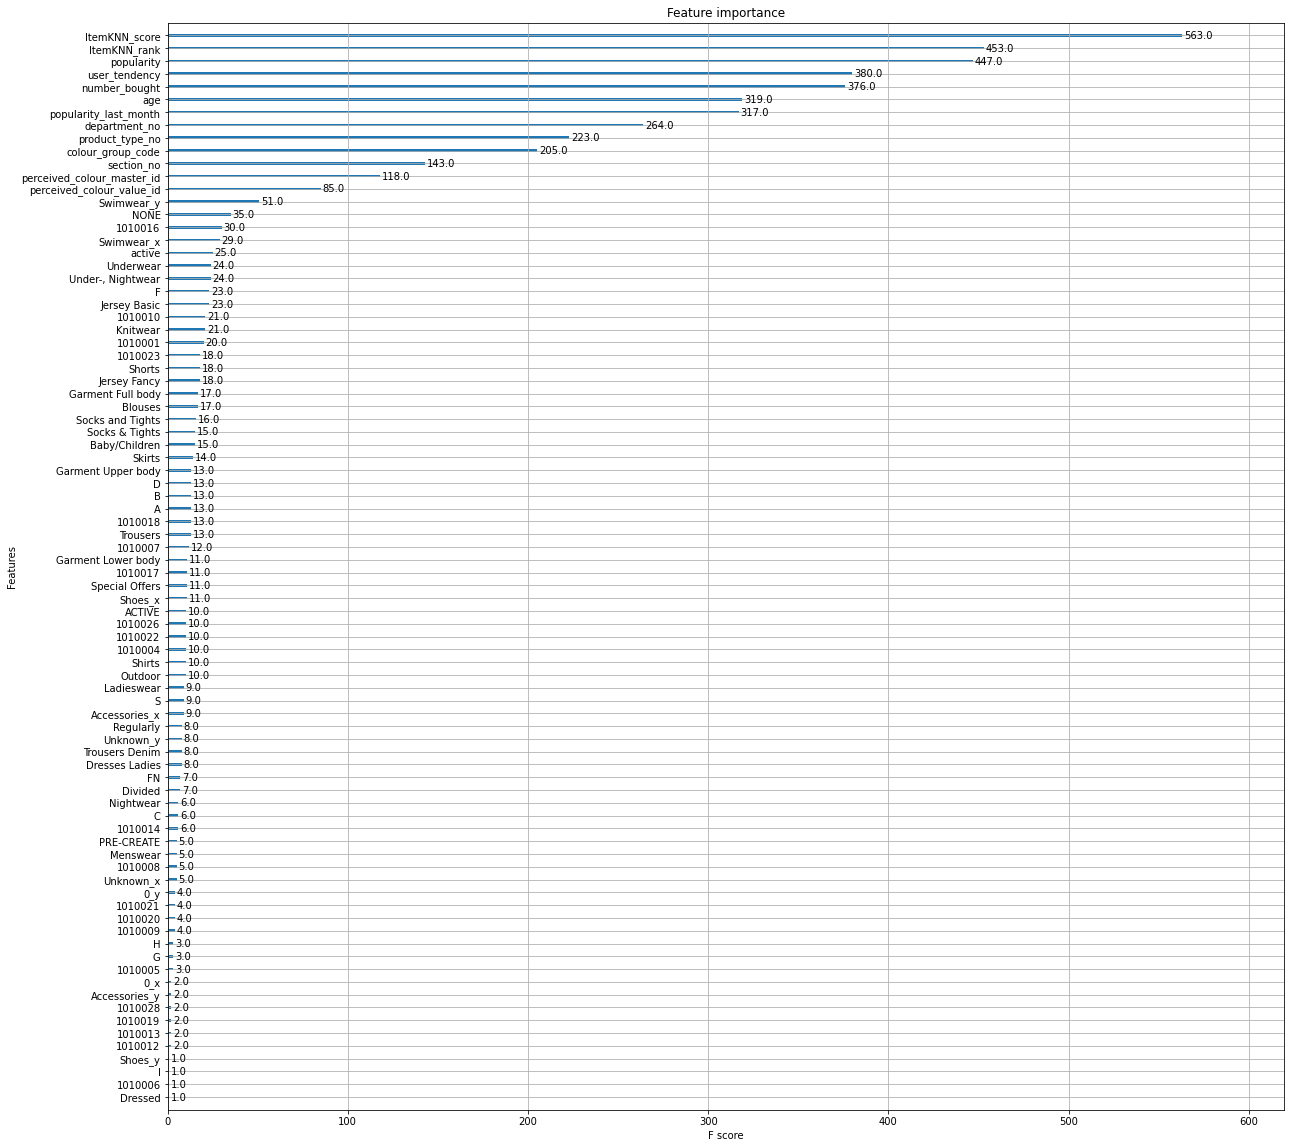

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [8]:
model.best_ntree_limit

66

In [9]:
features = pd.read_feather(dr.get_preprocessed_data_path()/ "xgb_predictions_datasets" / "dataset_v4.feather")

# Remember to use the bert_ntree_limit when taking the predictions

In [10]:
features.head()

,customer_id,article_id,ItemKNN_score,ItemKNN_rank,colour_group_code,department_no,Accessories_x,Blouses,Dressed,Dresses Ladies,...,0_x,ACTIVE,LEFT CLUB,PRE-CREATE,0_y,Monthly,NONE,Regularly,FN,user_tendency
0,0,1482,0.010266,1,71,1747,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
1,0,1638,0.010237,2,9,1747,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
2,0,1797,0.009981,3,73,1747,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
3,0,4861,0.006984,4,9,1722,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
4,0,1652,0.006967,5,10,1643,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286


In [11]:
customer_article_df = features[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
X = features.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)

In [12]:
X.head()

,ItemKNN_score,ItemKNN_rank,colour_group_code,department_no,Accessories_x,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,...,0_x,ACTIVE,LEFT CLUB,PRE-CREATE,0_y,Monthly,NONE,Regularly,FN,user_tendency
0,0.010266,1,71,1747,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
1,0.010237,2,9,1747,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
2,0.009981,3,73,1747,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
3,0.006984,4,9,1722,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.0,0.214286
4,0.006967,5,10,1643,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0.0,0.214286


In [13]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


KeyboardInterrupt: 

In [ ]:
customer_article_df["predicted_score"] = y_pred

In [ ]:
customer_article_df

,customer_id,article_id,predicted_score
0,0,1482,1.341285
1,0,1638,1.872801
2,0,1797,1.806833
3,0,4861,1.133399
4,0,1652,-1.994768
...,...,...,...
45448235,1136205,8347,-0.578885
45448236,1136205,13492,-0.963956
45448237,1136205,9715,-1.998497
45448238,1136205,14652,-0.825808


In [ ]:
sorted_scores = customer_article_df.sort_values([DEFAULT_USER_COL, "predicted_score"], ascending=False)

In [ ]:
sorted_scores

,customer_id,article_id,predicted_score
45448201,1136205,7580,1.694820
45448214,1136205,2609,0.058120
45448200,1136205,1765,0.005128
45448203,1136205,838,-0.085771
45448204,1136205,12955,-0.256635
...,...,...,...
35,0,651,-2.702639
28,0,2375,-2.716455
24,0,3706,-2.987859
38,0,411,-3.199163


In [ ]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [ ]:
CUTOFF = 100
filter_indices = []
for i in range(len(sorted_scores_index)):
    if i % CUTOFF == 0:
        filter_indices.extend(range(i, i+12))

In [ ]:
final_df = sorted_scores_index.loc[filter_indices]

In [ ]:
final_df

,customer_id,article_id,predicted_score
0,1136205,7580,1.694820
1,1136205,2609,0.058120
2,1136205,1765,0.005128
3,1136205,838,-0.085771
4,1136205,12955,-0.256635
...,...,...,...
45448207,0,6355,0.622818
45448208,0,308,0.402511
45448209,0,1990,0.066347
45448210,0,59,-0.221129


In [ ]:
final_final_df = final_df.drop("predicted_score", axis=1)

In [ ]:
from hnmchallenge.submission_handler import SubmissionHandler
sh = SubmissionHandler()                                               

In [ ]:
sh.create_submission_filtered_data([final_final_df], sub_name="XGB_v4")